In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [69]:
training = pd.read_csv('../data/North_Carolina/train_test_split/training.csv')

In [70]:
training

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,lat,lng,population,per_capita_income,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,165,Perquimans,13.0,10,76.9230769,2019,36.2059,-76.4411,12974.0,43290.0,...,28590.8,1823.8,3080.8,13526.2,20770.6,6428.8,316.6,557.4,4349.0,4363.4
1,91,Wayne,296.0,123,41.5540541,2018,35.3640,-78.0040,118048.0,39381.0,...,28576.2,3539.8,2403.6,20040.2,28576.2,7345.4,0.0,648.0,6174.4,7345.4
2,155,Mitchell,42.0,21,50,2019,36.0133,-82.1636,14926.0,37310.0,...,24181.8,8358.2,927.0,31226.8,24181.8,5617.4,1814.2,542.6,8084.4,5617.4
3,236,Henderson,565.0,375,66.371681416,2020,35.3363,-82.4800,116541.0,48378.0,...,30916.8,4962.4,1686.8,24107.2,30916.8,6860.6,332.2,1162.6,6481.0,6860.6
4,118,Columbus,120.0,19,15.8333333,2019,34.2657,-78.6550,51546.0,36074.0,...,28576.2,4031.0,718.0,20040.2,28576.2,7345.4,842.2,360.4,6174.4,7345.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,204,Cabarrus,1637.0,1068,65.241295052,2020,35.3868,-80.5519,227214.0,49313.0,...,22496.4,15354.6,872.0,24885.2,22496.4,6242.6,1207.8,524.6,6909.0,6242.6
379,213,Cleveland,528.0,296,56.060606061,2020,35.3341,-81.5555,99799.0,40777.0,...,25475.8,4846.0,2406.8,24107.2,25475.8,5874.8,0.0,835.4,6481.0,5874.8
380,472,Washington,NaN,NaN,NaN,2022,35.8225,-76.5775,10828.0,45405.0,...,28590.8,1879.4,850.8,13526.2,22352.4,6428.8,316.6,520.4,4349.0,5203.2
381,138,Harnett,339.0,134,39.5280236,2019,35.3689,-78.8693,133194.0,36523.0,...,25378.6,21019.4,1927.4,20040.2,25378.6,7509.2,2406.6,595.2,6174.4,7509.2


In [71]:
columns = training.columns[1:]

In [72]:
columns

Index(['County', 'EXAM_COUNT', 'EXAMS_3_OR_ABOVE', 'PERCENT_3_OR_ABOVE',
       'Year', 'lat', 'lng', 'population', 'per_capita_income',
       'closest_five_r1r2_avg', 'closest_five_public_avg',
       'closest_five_private_notprofit_avg', 'closest_five_landgrnt_avg',
       'closest_five_stem_avg', 'closest_five_avg_enrollment_r1r2',
       'closest_five_avg_enrollment_public',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_avg_dormrooms_public',
       'closest_five_avg_dormrooms_private_nfp',
       'closest_five_avg_dormrooms_landgrant',
       'closest_five_avg_dormrooms_stem'],
      dtype='object')

In [73]:
training = training[columns]

In [74]:
features = list(training.columns[5:])
features

['lat',
 'lng',
 'population',
 'per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_notprofit_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem',
 'closest_five_avg_dormrooms_r1r2',
 'closest_five_avg_dormrooms_public',
 'closest_five_avg_dormrooms_private_nfp',
 'closest_five_avg_dormrooms_landgrant',
 'closest_five_avg_dormrooms_stem']

In [75]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(training, test_size = 0.2, random_state = 226)

### statistical analysis with statsmodels

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [77]:
x_train = training.drop(['County','EXAM_COUNT','EXAMS_3_OR_ABOVE','PERCENT_3_OR_ABOVE','Year'],axis=1)
y_train = training[['PERCENT_3_OR_ABOVE']]
X_train = sm.add_constant(x_train)
unimetric_train = X_train.drop(['population','per_capita_income'],axis=1)
X_train

,const,lat,lng,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_notprofit_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,1.0,36.2059,-76.4411,12974.0,43290.0,137.046558,48.012134,57.740351,238.571107,110.317666,28590.8,1823.8,3080.8,13526.2,20770.6,6428.8,316.6,557.4,4349.0,4363.4
1,1.0,35.3640,-78.0040,118048.0,39381.0,98.040195,34.068629,49.812230,220.731530,98.040195,28576.2,3539.8,2403.6,20040.2,28576.2,7345.4,0.0,648.0,6174.4,7345.4
2,1.0,36.0133,-82.1636,14926.0,37310.0,135.878880,39.779031,38.358682,199.463716,135.878880,24181.8,8358.2,927.0,31226.8,24181.8,5617.4,1814.2,542.6,8084.4,5617.4
3,1.0,35.3363,-82.4800,116541.0,48378.0,134.033500,23.010380,34.220267,183.076750,134.033500,30916.8,4962.4,1686.8,24107.2,30916.8,6860.6,332.2,1162.6,6481.0,6860.6
4,1.0,34.2657,-78.6550,51546.0,36074.0,162.083794,44.127808,97.838009,265.551675,162.083794,28576.2,4031.0,718.0,20040.2,28576.2,7345.4,842.2,360.4,6174.4,7345.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1.0,35.3868,-80.5519,227214.0,49313.0,91.741941,29.883256,24.596159,183.714823,91.741941,22496.4,15354.6,872.0,24885.2,22496.4,6242.6,1207.8,524.6,6909.0,6242.6
379,1.0,35.3341,-81.5555,99799.0,40777.0,129.024685,33.206873,39.224774,197.321227,129.024685,25475.8,4846.0,2406.8,24107.2,25475.8,5874.8,0.0,835.4,6481.0,5874.8
380,1.0,35.8225,-76.5775,10828.0,45405.0,150.783757,57.572774,95.126658,255.982102,132.982444,28590.8,1879.4,850.8,13526.2,22352.4,6428.8,316.6,520.4,4349.0,5203.2
381,1.0,35.3689,-78.8693,133194.0,36523.0,81.968651,35.631862,26.026482,186.518615,81.968651,25378.6,21019.4,1927.4,20040.2,25378.6,7509.2,2406.6,595.2,6174.4,7509.2


In [78]:
y_train = y_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.apply(pd.to_numeric, errors='coerce')
unimetric_train = X_train.apply(pd.to_numeric, errors='coerce')

In [79]:
print(unimetric_train.isna().sum())

const                                      0
lat                                        6
lng                                        6
population                                 6
per_capita_income                          6
closest_five_r1r2_avg                      6
closest_five_public_avg                    6
closest_five_private_notprofit_avg         6
closest_five_landgrnt_avg                  6
closest_five_stem_avg                      6
closest_five_avg_enrollment_r1r2           6
closest_five_avg_enrollment_public         6
closest_five_avg_enrollment_private_nfp    6
closest_five_avg_enrollment_landgrnt       6
closest_five_avg_enrollment_stem           6
closest_five_avg_dormrooms_r1r2            6
closest_five_avg_dormrooms_public          6
closest_five_avg_dormrooms_private_nfp     6
closest_five_avg_dormrooms_landgrant       6
closest_five_avg_dormrooms_stem            6
dtype: int64


In [80]:
print(np.isinf(unimetric_train).sum())

const                                      0
lat                                        0
lng                                        0
population                                 0
per_capita_income                          0
closest_five_r1r2_avg                      0
closest_five_public_avg                    0
closest_five_private_notprofit_avg         0
closest_five_landgrnt_avg                  0
closest_five_stem_avg                      0
closest_five_avg_enrollment_r1r2           0
closest_five_avg_enrollment_public         0
closest_five_avg_enrollment_private_nfp    0
closest_five_avg_enrollment_landgrnt       0
closest_five_avg_enrollment_stem           0
closest_five_avg_dormrooms_r1r2            0
closest_five_avg_dormrooms_public          0
closest_five_avg_dormrooms_private_nfp     0
closest_five_avg_dormrooms_landgrant       0
closest_five_avg_dormrooms_stem            0
dtype: int64


In [81]:
y_train = y_train.fillna(0)  # or use another strategy like mean, median, etc.
X_train = X_train.fillna(0)  # or use another strategy like mean, median, etc.
unimetric_train = unimetric_train.fillna(0)  # or use another strategy like mean, median, etc.

In [82]:
training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')

C:\Users\amahapatra\AppData\Local\Temp\ipykernel_39736\66272972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['PERCENT_3_OR_ABOVE'] = pd.to_numeric(training['PERCENT_3_OR_ABOVE'], errors='coerce')


In [83]:
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()

In [84]:
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_notprofit_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()

In [85]:

full_model = sm.OLS(y_train,X_train).fit()
unimetric_model = sm.OLS(y_train,unimetric_train).fit()
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_notprofit_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()
pci_model=smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income', data =training).fit()

In [86]:
f_test_nonuni = full_model.compare_f_test(nonuni_model)
f_test_unimetric = full_model.compare_f_test(unimetric_model)
f_test_unidistance = unimetric_model.compare_f_test(unidistance_model)
print("p-value of full compared to non-university metric model:", f_test_nonuni[1])
print("p-value of full compared to university metric model:", f_test_unimetric[1])
print("p-value of university metric compared to university distance model:", f_test_unidistance[1])

p-value of full compared to non-university metric model: nan
p-value of full compared to university metric model: nan
p-value of university metric compared to university distance model: nan


C:\Users\amahapatra\.conda\envs\am-env\Lib\site-packages\statsmodels\regression\linear_model.py:2284: RuntimeWarning: invalid value encountered in scalar divide
  f_value = (ssr_restr - ssr_full) / df_diff / ssr_full * df_full


In [87]:
print(y_train.dtypes)
print(X_train.dtypes)

PERCENT_3_OR_ABOVE    float64
dtype: object
const                                      float64
lat                                        float64
lng                                        float64
population                                 float64
per_capita_income                          float64
closest_five_r1r2_avg                      float64
closest_five_public_avg                    float64
closest_five_private_notprofit_avg         float64
closest_five_landgrnt_avg                  float64
closest_five_stem_avg                      float64
closest_five_avg_enrollment_r1r2           float64
closest_five_avg_enrollment_public         float64
closest_five_avg_enrollment_private_nfp    float64
closest_five_avg_enrollment_landgrnt       float64
closest_five_avg_enrollment_stem           float64
closest_five_avg_dormrooms_r1r2            float64
closest_five_avg_dormrooms_public          float64
closest_five_avg_dormrooms_private_nfp     float64
closest_five_avg_dormrooms_landgrant  

In [88]:
print(y_train.shape)
print(X_train.shape)

(383, 1)
(383, 20)


In [89]:
full_model = sm.OLS(y_train, X_train).fit()

### models with sklearn

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [91]:
uni_features = list(training.columns[10:])
nonuni_features = list(training.columns[8:10])
features_wo_dormrooms = list(training.columns[8:-5])
coordinates = ['Latitude','Longitude']
features_wo_dormrooms

['per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_notprofit_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem']

In [92]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'
train[features] = imputer.fit_transform(train[features])

In [93]:
# Replace NaN values with zero
train = train.fillna(0)
# Replace '*' with zero in the entire DataFrame
train = train.replace('*', 0)

In [94]:
fullmodel = LinearRegression()
fullmodel.fit(train[features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [95]:
unimodel = LinearRegression()
unimodel.fit(train[uni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [96]:

nonunimodel = LinearRegression()
nonunimodel.fit(train[nonuni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [97]:
wodormrooms_model = LinearRegression()
wodormrooms_model.fit(train[features_wo_dormrooms],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [98]:
fullmodel.intercept_

np.float64(-819.6191176250999)

In [99]:
fullmodel.coef_

array([ 2.29898848e+00, -8.41882989e+00, -1.75443381e-05,  9.39392853e-04,
       -5.83961251e-01, -1.27445836e-01, -3.35446036e-01,  7.41496950e-01,
        2.15601225e-01, -2.79929805e-04,  1.25251359e-04,  5.63531472e-04,
        1.70475132e-03,  1.44775434e-04, -1.13221706e-03,  1.10883913e-03,
        3.95855909e-03, -9.33684623e-03,  1.06831004e-03])

In [100]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [101]:
# Replace '*' with zero in the entire DataFrame
validation = validation.replace('*', 0)
# Replace NaN values with zero
validation = validation.fillna(0)

In [102]:

print(f"full model rmse:",root_mean_squared_error(fullmodel.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"full model R-squared score:",fullmodel.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

full model rmse: 140.71461855559374
full model R-squared score: -36.448273349081425


In [103]:
print(f"uni model rmse:",root_mean_squared_error(unimodel.predict(validation[uni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"uni model R-squared score:",unimodel.score(validation[uni_features],validation['PERCENT_3_OR_ABOVE']))

uni model rmse: 22.40642423013831
uni model R-squared score: 0.050492342606082596


In [104]:
print(f"non uni model rmse:",root_mean_squared_error(nonunimodel.predict(validation[nonuni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"non uni model R-squared score:",nonunimodel.score(validation[nonuni_features],validation['PERCENT_3_OR_ABOVE']))

non uni model rmse: 23.178168775828688
non uni model R-squared score: -0.016041868698811745


In [105]:
print(f"w/o dormrooms model rmse:",root_mean_squared_error(wodormrooms_model.predict(validation[features_wo_dormrooms]),validation['PERCENT_3_OR_ABOVE']))
print(f"w/o dormrooms model R-squared score:",wodormrooms_model.score(validation[features_wo_dormrooms],validation['PERCENT_3_OR_ABOVE']))

w/o dormrooms model rmse: 24.493120647536756
w/o dormrooms model R-squared score: -0.1345969354210279


### 5-Fold cross-validation for the four models

In [106]:
## import KFold and kNeighborsRegressor here
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [107]:
num_splits = 5
num_models = 5
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the mse for each model and split
rmses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]

    # Replace '*' with zero in the entire DataFrame
    northcarolina_train = northcarolina_train.replace('*', 0)
    # Replace NaN values with zero
    northcarolina_train = northcarolina_train.fillna(0)
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]

    # Replace '*' with zero in the entire DataFrame
    northcarolina_holdout = northcarolina_holdout.replace('*', 0)
    # Replace NaN values with zero
    northcarolina_holdout = northcarolina_holdout.fillna(0)
    
    ## "Fit" and get ho mse for the "take the mean and call it a day" model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)

    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))

    ## Fit and get ho mse for nonuni model
    nonuni_lr = LinearRegression()
    
    nonuni_lr.fit(northcarolina_train[nonuni_features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], nonuni_lr.predict(northcarolina_holdout[nonuni_features]))

    ## Fit and get ho mse for uni model
    uni_lr = LinearRegression()

    uni_lr.fit(northcarolina_train[uni_features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], uni_lr.predict(northcarolina_holdout[uni_features]))

    ## Fit and get ho mse for no dorm rooms model
    nodorm_lr = LinearRegression()

    nodorm_lr.fit(northcarolina_train[features_wo_dormrooms],northcarolina_train['PERCENT_3_OR_ABOVE'])

    rmses[4, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], nodorm_lr.predict(northcarolina_holdout[features_wo_dormrooms]))
    i=i+1

In [108]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
fullmodel Avg. CV RMSE: 18.530327170155257 and STD: 0.6082170726302923
PCA model Avg. CV RMSE: 21.882644687783053 and STD: 0.8477303781970894
Ridge model Avg. CV RMSE: 20.193072433466128 and STD: 1.5583583645862518


### Full model performs clearly the best. The "no dorm rooms" model is the second best, though uni model is not far behind. While nonuni model lags behind, the difference is still not that big.

### PCA

In [110]:
# Replace '*' with zero in the entire DataFrame
training = training.replace('*', 0)
# Replace NaN values with zero
training = training.fillna(0)

In [111]:
scaler = StandardScaler()
training_scaled = scaler.fit_transform(training[features])
training_scaled.shape

(383, 19)

In [112]:
pca = PCA(0.95)
training_pca = pca.fit_transform(training_scaled)

In [113]:
training_pca.shape

(383, 9)

In [114]:
pca.explained_variance_ratio_

array([0.35087335, 0.2416086 , 0.09987177, 0.08458435, 0.06975953,
       0.04715407, 0.02707663, 0.02119434, 0.01666201])

### Comparing PCA model and Ridge model and the full model

In [115]:
pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

In [116]:
pca_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])
ridge_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])

Pipeline(steps=[('scale', StandardScaler()), ('ridge', Ridge())])

In [117]:
print(f"pca(0.95) model rmse:",root_mean_squared_error(pca_pipe.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"pca(0.95) model R-squared score:",pca_pipe.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

pca(0.95) model rmse: 31.463769019417647
pca(0.95) model R-squared score: -0.8722974813840458


### Let's compare full model, ridge model and PCA model with 5-fold cross validation.

In [118]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))
    rsquared[1, i] = full_lr.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for PCA model
    pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
    
    pca_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], pca_pipe.predict(northcarolina_holdout[features]))
    rsquared[2, i] = pca_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for Ridge model
    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

    ridge_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ridge_pipe.predict(northcarolina_holdout[features]))
    rsquared[3, i] = ridge_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])

    i = i+1

In [119]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
fullmodel Avg. CV RMSE: 18.530327170155257 and STD: 0.6082170726302923
PCA model Avg. CV RMSE: 20.613583264384957 and STD: 0.7180440236747055
Ridge model Avg. CV RMSE: 18.50022143690347 and STD: 0.7446346878127362


In [121]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"fullmodel Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"PCA model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Ridge model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.011155041633108365 and STD: 0.01234168996463262
fullmodel Avg. CV score: 0.3388052500632738 and STD: 0.07050388249361426
PCA model Avg. CV score: 0.18256590473093892 and STD: 0.08053823279304409
Ridge model Avg. CV score: 0.34154280131757725 and STD: 0.06927857284376142


### model using xgboost

In [122]:
import xgboost as xgb
xgb.__version__

'2.1.3'

In [123]:
X_train = train[features]
y_train = train['PERCENT_3_OR_ABOVE']
X_test = validation[features]
y_test = validation['PERCENT_3_OR_ABOVE']

In [124]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test,y_test,enable_categorical=True)

In [125]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
n = 1000

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
)

[0]	train-rmse:17.51858	validation-rmse:19.77376
[10]	train-rmse:5.24249	validation-rmse:17.06030
[20]	train-rmse:3.63082	validation-rmse:16.89176
[30]	train-rmse:2.83377	validation-rmse:16.91803
[40]	train-rmse:2.36815	validation-rmse:16.82094
[50]	train-rmse:2.15369	validation-rmse:16.82869
[60]	train-rmse:2.02711	validation-rmse:16.85106
[70]	train-rmse:1.95181	validation-rmse:16.81903
[80]	train-rmse:1.90780	validation-rmse:16.83578
[90]	train-rmse:1.88074	validation-rmse:16.83765
[100]	train-rmse:1.86744	validation-rmse:16.82910
[110]	train-rmse:1.85979	validation-rmse:16.82926
[120]	train-rmse:1.85545	validation-rmse:16.83223
[130]	train-rmse:1.85377	validation-rmse:16.83756
[140]	train-rmse:1.85283	validation-rmse:16.84108
[145]	train-rmse:1.85231	validation-rmse:16.84245


In [126]:
# Example: New data to predict
X_new = training[features].head(3)  ## just use the old data as a quick example

# Create a DMatrix for the new data
dnew_reg = xgb.DMatrix(X_new, enable_categorical=True)

# Make predictions
y_pred_new = xgb_model.predict(dnew_reg)

print('Predictions for new percentage of AP outcomes that scores 3-5:')
print(y_pred_new)

Predictions for new percentage of AP outcomes that scores 3-5:
[76.823494 41.431362 51.514835]


In [127]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=100
)

results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.574691,0.187025,19.371379,0.577395
1,13.930137,0.409189,17.503759,0.725653
2,11.448786,0.616654,16.344991,0.824593
3,9.657085,0.693981,15.793364,0.827794
4,8.358582,0.850728,15.347780,0.821358


In [128]:
mean_train_rmse = results['train-rmse-mean'].iloc[-1]  # Final mean train RMSE
std_train_rmse = results['train-rmse-std'].iloc[-1]    # Final std dev train RMSE

mean_val_rmse = results['test-rmse-mean'].iloc[-1]     # Final mean validation RMSE
std_val_rmse = results['test-rmse-std'].iloc[-1]       # Final std dev validation RMSE

# Print results
print(f"Training RMSE: {mean_train_rmse:.4f} +/- {std_train_rmse:.4f}")
print(f"Validation RMSE: {mean_val_rmse:.4f} +/- {std_val_rmse:.4f}")

Training RMSE: 3.9985 +/- 0.6017
Validation RMSE: 14.9723 +/- 0.6520


### compare xgboost with full model and ridge model from before

In [129]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(northcarolina_holdout[features]))
    rsquared[1, i] = full_lr.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])

    ## Fit and get ho mse for xgboost model
    
    dtrain_reg = xgb.DMatrix(northcarolina_train[features], northcarolina_train['PERCENT_3_OR_ABOVE'], enable_categorical=True)
    dtest_reg = xgb.DMatrix(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'],enable_categorical=True)

    params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
    n = 1000

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
    )

    y_pred = xgb_model.predict(dtest_reg)
    rmses[2,i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'],y_pred)
    rsquared[2, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], y_pred)

    
    ## Fit and get ho mse for Ridge model
    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

    ridge_pipe.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ridge_pipe.predict(northcarolina_holdout[features]))
    rsquared[3, i] = ridge_pipe.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])


    i = i+1



[0]	train-rmse:17.74298	validation-rmse:20.23275
[10]	train-rmse:5.24998	validation-rmse:16.90752
[20]	train-rmse:3.60553	validation-rmse:17.15403
[30]	train-rmse:2.87211	validation-rmse:17.17277
[40]	train-rmse:2.42169	validation-rmse:17.10886
[50]	train-rmse:2.08613	validation-rmse:17.09940
[60]	train-rmse:1.97687	validation-rmse:17.11621
[70]	train-rmse:1.91249	validation-rmse:17.11970
[80]	train-rmse:1.88230	validation-rmse:17.10941
[90]	train-rmse:1.86763	validation-rmse:17.09378
[100]	train-rmse:1.86003	validation-rmse:17.09898
[106]	train-rmse:1.85797	validation-rmse:17.10335
[0]	train-rmse:18.13335	validation-rmse:18.98075
[10]	train-rmse:6.21412	validation-rmse:14.44407
[20]	train-rmse:3.91740	validation-rmse:14.46563
[30]	train-rmse:2.90511	validation-rmse:14.73286
[40]	train-rmse:2.24163	validation-rmse:14.77464
[50]	train-rmse:1.84015	validation-rmse:14.84825
[60]	train-rmse:1.53772	validation-rmse:14.91198
[70]	train-rmse:1.40819	validation-rmse:14.92364
[80]	train-rmse:1.

In [130]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"xgboost model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
fullmodel Avg. CV RMSE: 18.530327170155257 and STD: 0.6082170726302923
xgboost model Avg. CV RMSE: 15.816677442725993 and STD: 0.7228061181940242
Ridge model Avg. CV RMSE: 18.50022143690347 and STD: 0.7446346878127362


In [131]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"fullmodel Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"Xgboost model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Ridge model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.011155041633108365 and STD: 0.01234168996463262
fullmodel Avg. CV score: 0.3388052500632738 and STD: 0.07050388249361426
Xgboost model Avg. CV score: 0.5193825084237004 and STD: 0.0449647979304041
Ridge model Avg. CV score: 0.34154280131757725 and STD: 0.06927857284376142


### RandomForestRegressor and Adaboost

In [132]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [133]:

import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 8


In [134]:

random_forest = RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=N_CORES)
random_forest.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=5, n_jobs=8, random_state=0)

In [135]:

root_mean_squared_error(random_forest.predict(X_test),y_test)

np.float64(17.55284168824085)

In [136]:

random_forest.score(X_test,y_test)

0.417295684512484

In [137]:
dtree_reg = DecisionTreeRegressor(max_depth=4)

In [138]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=226)

In [139]:

dtree_reg.fit(train[features], train['PERCENT_3_OR_ABOVE'])
ada_reg.fit(train[features], train['PERCENT_3_OR_ABOVE'])

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=226)

In [140]:
root_mean_squared_error(dtree_reg.predict(validation[features]),validation['PERCENT_3_OR_ABOVE'])

np.float64(19.53660887770755)

In [141]:
dtree_reg.score(validation[features],validation['PERCENT_3_OR_ABOVE'])

0.2781420783574675

In [142]:
root_mean_squared_error(ada_reg.predict(validation[features]),validation['PERCENT_3_OR_ABOVE'])

np.float64(17.87725948129855)

In [143]:
ada_reg.score(validation[features],validation['PERCENT_3_OR_ABOVE'])

0.39555714210978465

### 5-Fold cross-validation comparison between Adaboost, Xgboost and RandomForest.

In [145]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    northcarolina_train = training.iloc[train_index]
    
    ## cv holdout set
    northcarolina_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model

    baseline_pred = northcarolina_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(northcarolina_holdout))
    
    rmses[0, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for Adaboost model
    dtree_reg = DecisionTreeRegressor(max_depth=4)

    ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=226)

    ada_reg.fit(northcarolina_train[features], northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], ada_reg.predict(northcarolina_holdout[features]))
    rsquared[1, i] = ada_reg.score(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'])
    
    
    ## Fit and get ho mse for xgboost model
    
    dtrain_reg = xgb.DMatrix(northcarolina_train[features], northcarolina_train['PERCENT_3_OR_ABOVE'], enable_categorical=True)
    dtest_reg = xgb.DMatrix(northcarolina_holdout[features],northcarolina_holdout['PERCENT_3_OR_ABOVE'],enable_categorical=True)

    params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
    n = 1000

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
    )

    y_pred = xgb_model.predict(dtest_reg)
    rmses[2,i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'],y_pred)
    rsquared[2, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], y_pred)

    
    ## Fit and get ho mse for Random Forest model
    random_forest = RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=N_CORES)
    random_forest.fit(northcarolina_train[features],northcarolina_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(northcarolina_holdout['PERCENT_3_OR_ABOVE'], random_forest.predict(northcarolina_holdout[features]))
    rsquared[3, i] = r2_score(northcarolina_holdout['PERCENT_3_OR_ABOVE'], random_forest.predict(northcarolina_holdout[features]))


    i = i+1

[0]	train-rmse:17.74298	validation-rmse:20.23275
[10]	train-rmse:5.24998	validation-rmse:16.90752
[20]	train-rmse:3.60553	validation-rmse:17.15403
[30]	train-rmse:2.87211	validation-rmse:17.17277
[40]	train-rmse:2.42169	validation-rmse:17.10886
[50]	train-rmse:2.08613	validation-rmse:17.09940
[60]	train-rmse:1.97687	validation-rmse:17.11621
[70]	train-rmse:1.91249	validation-rmse:17.11970
[80]	train-rmse:1.88230	validation-rmse:17.10941
[90]	train-rmse:1.86763	validation-rmse:17.09378
[100]	train-rmse:1.86003	validation-rmse:17.09898
[107]	train-rmse:1.85734	validation-rmse:17.10413
[0]	train-rmse:18.13335	validation-rmse:18.98075
[10]	train-rmse:6.21412	validation-rmse:14.44407
[20]	train-rmse:3.91740	validation-rmse:14.46563
[30]	train-rmse:2.90511	validation-rmse:14.73286
[40]	train-rmse:2.24163	validation-rmse:14.77464
[50]	train-rmse:1.84015	validation-rmse:14.84825
[60]	train-rmse:1.53772	validation-rmse:14.91198
[70]	train-rmse:1.40819	validation-rmse:14.92364
[80]	train-rmse:1.

In [146]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"Adaboost model Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"xgboost model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Random forest model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 22.98290101042038 and STD: 0.8708099752892302
Adaboost model Avg. CV RMSE: 16.260764465117397 and STD: 1.1473138120252877
xgboost model Avg. CV RMSE: 15.816677442725993 and STD: 0.7228061181940242
Random forest model Avg. CV RMSE: 14.796016562475618 and STD: 1.342028872864457


In [147]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"Adaboost Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"Xgboost model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Random forest model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.011155041633108365 and STD: 0.01234168996463262
Adaboost Avg. CV score: 0.49097343545731836 and STD: 0.07049148069240853
Xgboost model Avg. CV score: 0.5193825084237004 and STD: 0.0449647979304041
Random forest model Avg. CV score: 0.5734487198007917 and STD: 0.08933048777584224


In [155]:
import pickle
from joblib import Parallel, delayed 

In [156]:
joblib.dump(random_forest, '../data/NC_pickled/NC_random_forest_model.pkl')

['../data/NC_pickled/NC_random_forest_model.pkl']

### SHAP to explain our xgboost model

In [148]:
import shap

In [149]:
#explainer = shap.Explainer(random_forest,X_train)
#shap_values = explainer(X_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

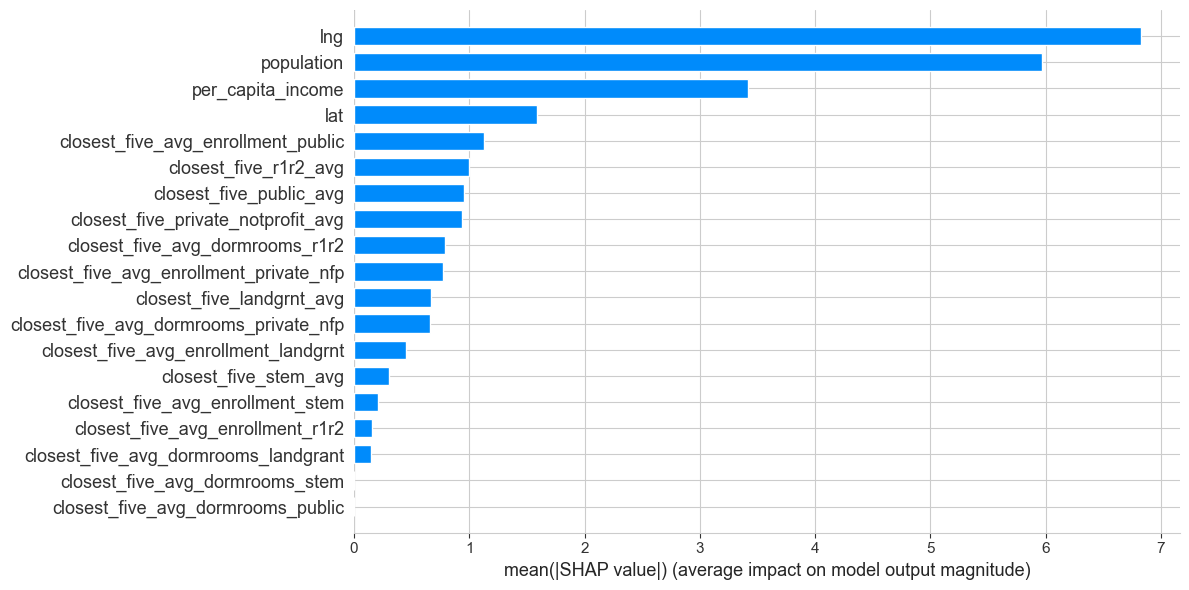

In [150]:
shap.summary_plot(
    shap_values, 
    X_train, 
    plot_type='bar', 
    show=False,
    plot_size=[12, 6]
)
plt.show()
plt.close()

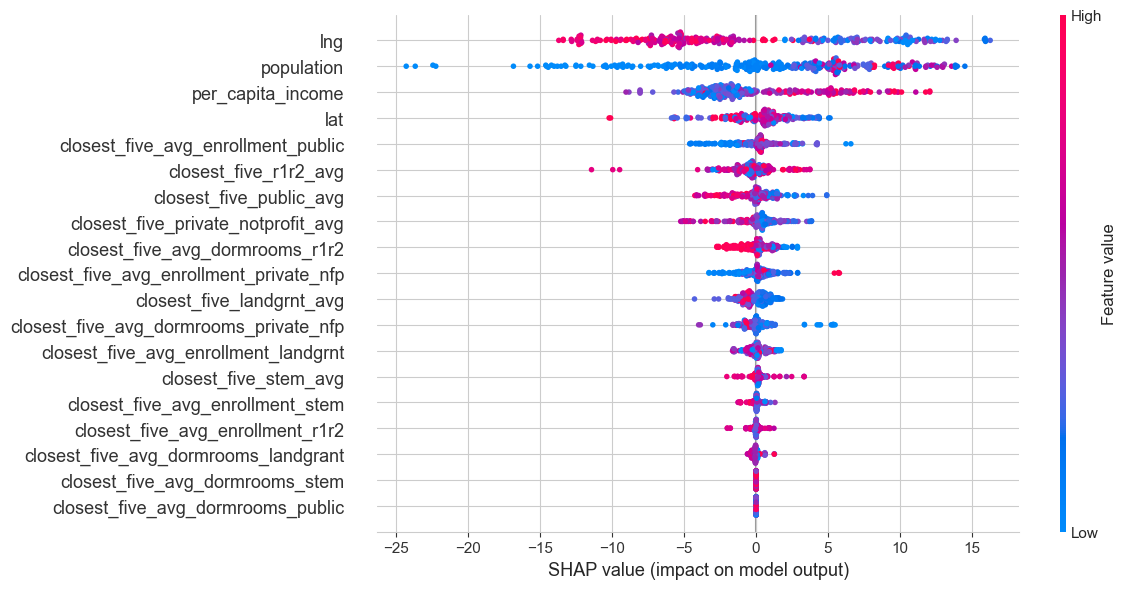

In [67]:
### the scatter plot
shap.summary_plot(shap_values, X_train, show=False, plot_size=[12, 6])
plt.show()
plt.close()

### Random Forest model

In [151]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train)

In [152]:

# Compute mean absolute SHAP value for each feature
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

print("Feature Importance from SHAP:\n")
print(shap_importance)

Feature Importance from SHAP:

                                    Feature  Importance
1                                       lng    7.167061
2                                population    4.796527
3                         per_capita_income    3.405888
5                   closest_five_public_avg    1.502363
6        closest_five_private_notprofit_avg    0.919339
0                                       lat    0.835002
7                 closest_five_landgrnt_avg    0.777263
10       closest_five_avg_enrollment_public    0.706753
11  closest_five_avg_enrollment_private_nfp    0.598829
9          closest_five_avg_enrollment_r1r2    0.585035
14          closest_five_avg_dormrooms_r1r2    0.475777
16   closest_five_avg_dormrooms_private_nfp    0.451288
8                     closest_five_stem_avg    0.427429
4                     closest_five_r1r2_avg    0.376883
18          closest_five_avg_dormrooms_stem    0.220524
13         closest_five_avg_enrollment_stem    0.188471
15        closest

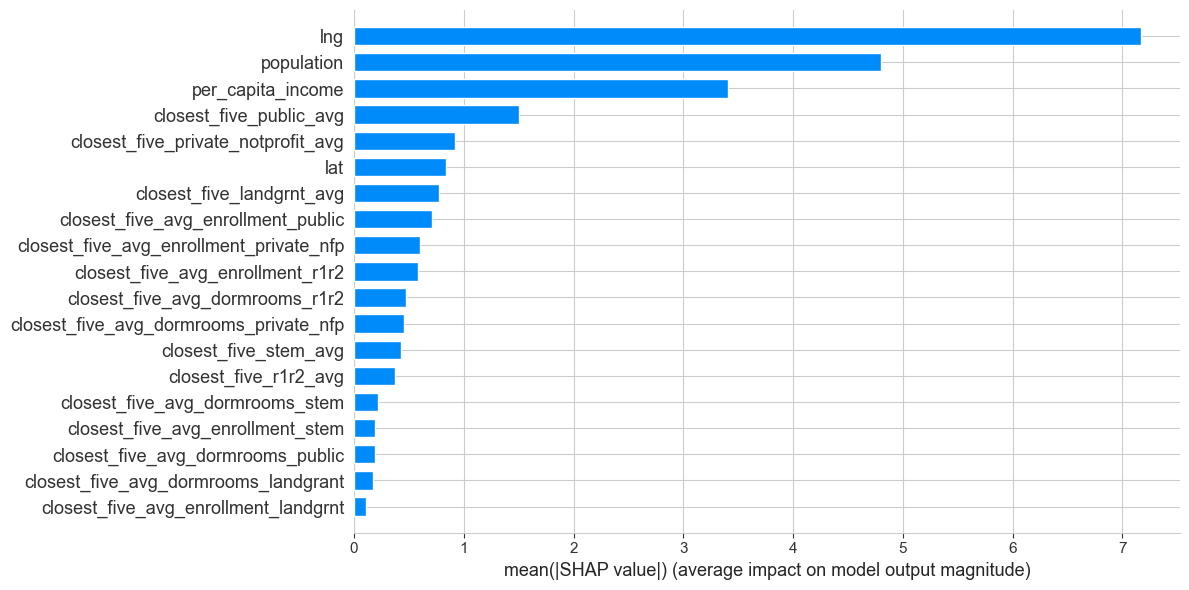

In [157]:
fig = plt.figure()
shap.summary_plot(
    shap_values, 
    X_train, 
    plot_type='bar', 
    show=False,
    plot_size=[12, 6]
)
with open('../data/NC_pickled/shap_random_forest_bar_plot.pkl', 'wb') as f:
    pickle.dump(fig, f) 
plt.show(fig)
plt.close()

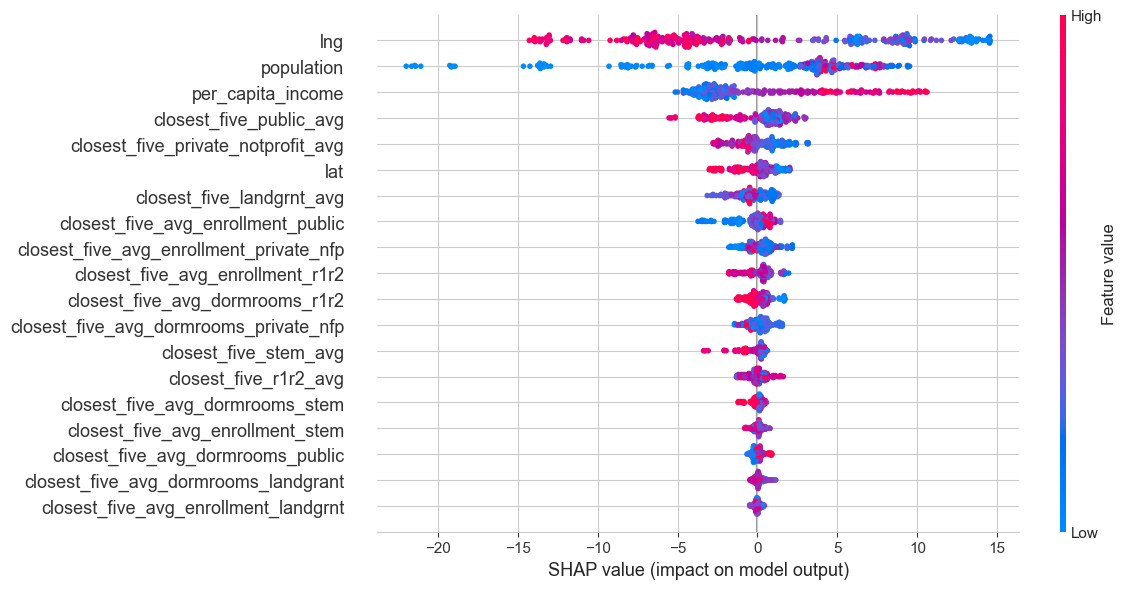

In [158]:

### the scatter plot
fig = plt.figure()
shap.summary_plot(shap_values, X_train, show=False, plot_size=[12, 6])
with open('../data/NC_pickled/shap_random_forest_scatter_plot.pkl', 'wb') as f:
    pickle.dump(fig, f) 
plt.show(fig)
plt.close()

### Random Forest model to make predictions on the testing data

In [159]:
testing = pd.read_csv('../data/North_Carolina/train_test_split/testing.csv')

In [160]:
preds=random_forest.predict(testing[features])


In [162]:
predictions = testing[['County','Year','PERCENT_3_OR_ABOVE']]
predictions['Predicted pass rate'] = preds


C:\Users\amahapatra\AppData\Local\Temp\ipykernel_39736\946908726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Predicted pass rate'] = preds


In [163]:
predictions

,County,Year,PERCENT_3_OR_ABOVE,Predicted pass rate
0,Hertford,2022,NaN,6.282448
1,Mcdowell,2020,43.835616438,37.358645
2,Carteret,2022,83.333333333,59.601336
3,Beaufort,2021,15.131578947,43.951617
4,Cherokee,2019,32.3529412,46.906012
...,...,...,...,...
91,Polk,2018,66.6666667,55.661893
92,Caswell,2018,28.4090909,28.835942
93,Buncombe,2018,55,55.529737
94,Greene,2019,22.2222222,32.254554


In [165]:
# Replace NaN values with zero
predictions = predictions.fillna(0)
# Replace '*' with zero in the entire DataFrame
predictions = predictions.replace('*', 0)

In [166]:
root_mean_squared_error(predictions['Predicted pass rate'],predictions['PERCENT_3_OR_ABOVE']) # Root mean squared error of our predictions.


np.float64(14.030627272279967)

In [167]:
r2_score(predictions['Predicted pass rate'],predictions['PERCENT_3_OR_ABOVE']) # R-squared coefficient of our predictions.


0.17010228948887873